In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [104]:
df = pd.read_csv("train.csv")

# Descriptive analysis

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
for column in df.columns:
    try:
        print(f"===============Column: {column}==============")
        print(f"Number of unique values: {df[column].nunique()}")
        print(f"Max: {df[column].max()}")
        print(f"Min: {df[column].min()}")
    except TypeError:
        pass

===============Column: PassengerId==============
Number of unique values: 891
Max: 891
Min: 1
===============Column: Survived==============
Number of unique values: 2
Max: 1
Min: 0
===============Column: Pclass==============
Number of unique values: 3
Max: 3
Min: 1
===============Column: Name==============
Number of unique values: 891
Max: van Melkebeke, Mr. Philemon
Min: Abbing, Mr. Anthony
===============Column: Sex==============
Number of unique values: 2
Max: male
Min: female
===============Column: Age==============
Number of unique values: 88
Max: 80.0
Min: 0.42
===============Column: SibSp==============
Number of unique values: 7
Max: 8
Min: 0
===============Column: Parch==============
Number of unique values: 7
Max: 6
Min: 0
===============Column: Ticket==============
Number of unique values: 681
Max: WE/P 5735
Min: 110152
===============Column: Fare==============
Number of unique values: 248
Max: 512.3292
Min: 0.0
===============Column: Cabin==============
Number of unique valu

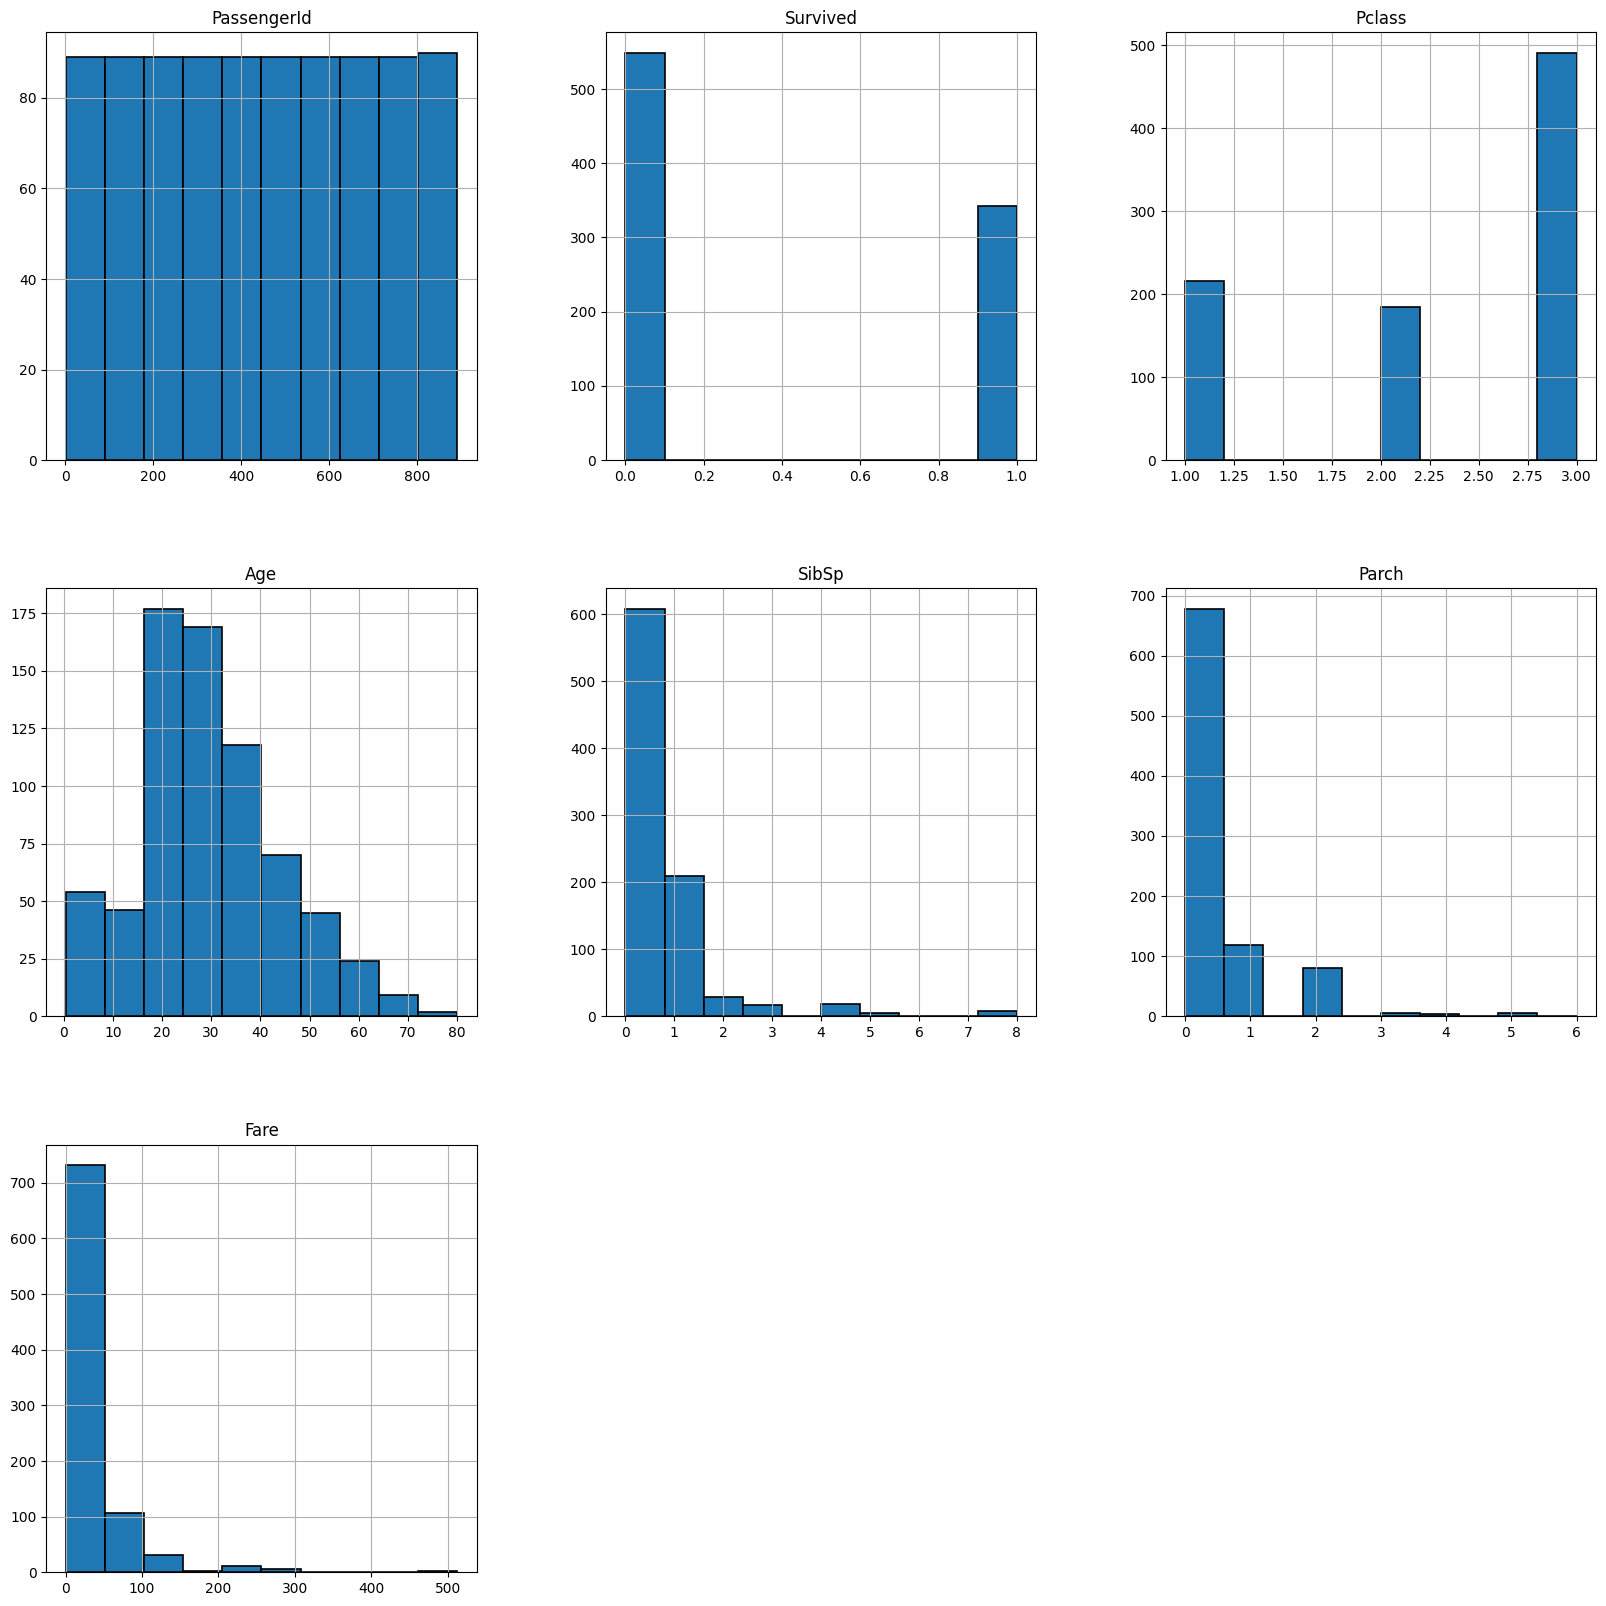

In [109]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

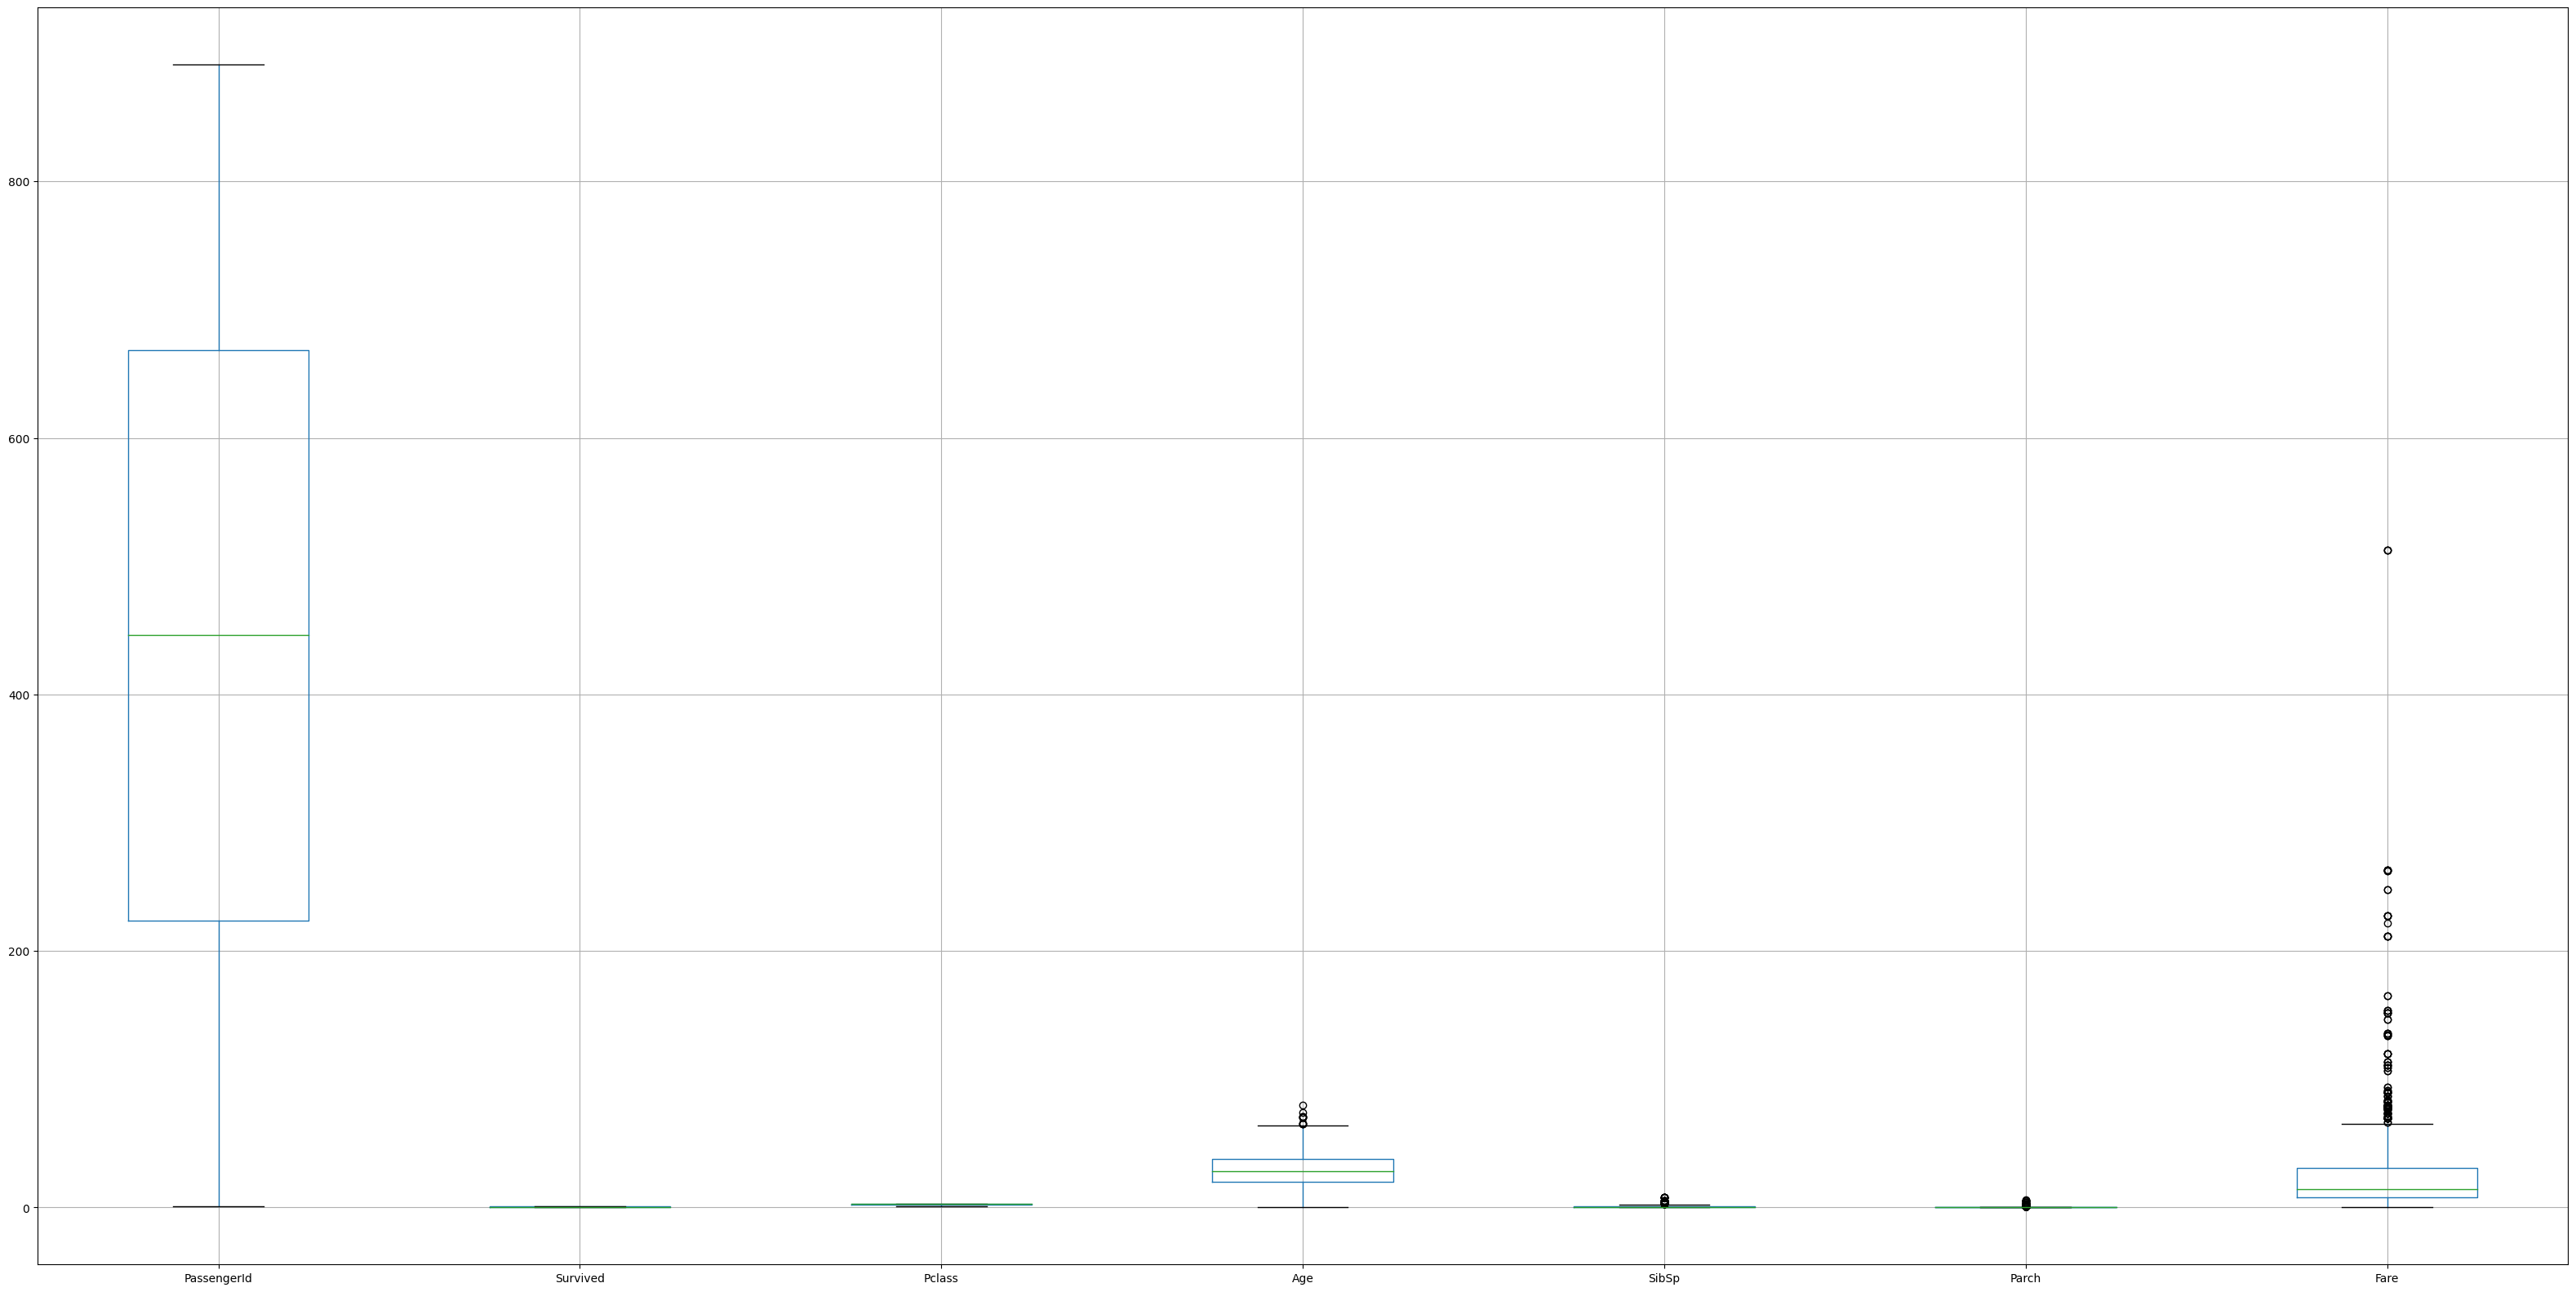

In [110]:
df.boxplot(figsize=(40, 20))

# PREPROCESSING

In [127]:

def preprocess_data(df):
    preprocessed = df
    preprocessed['Sex'] = preprocessing.LabelEncoder().fit_transform(df['Sex'])
    preprocessed['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
#     preprocessed["Cabin"] = preprocessed["Cabin"].fillna(0)
#     preprocessed["Cabin"] = preprocessed["Cabin"].map(lambda x: 1 if x != 0 else 0)
    preprocessed = preprocessed.drop("Cabin", axis=1)
    preprocessed = preprocessed.drop("Fare", axis=1)
    preprocessed = preprocessed.drop("Name", axis=1)
    preprocessed = preprocessed.drop("Ticket", axis=1)
    preprocessed = preprocessed.drop("PassengerId", axis=1)

    survivors_mean_age = round(preprocessed.loc[(preprocessed["Survived"] == 1) & (preprocessed["Age"] > 0), "Age"].values.mean(), 1)
    deaths_mean_age = round(preprocessed.loc[(preprocessed["Survived"] == 1) & (preprocessed["Age"] > 0), "Age"].values.mean(), 1)
    def fill_empty_age(row):
        if np.isnan(row["Age"]) and row["Survived"] == 1:
            return survivors_mean_age
        elif np.isnan(row["Age"]) and row["Survived"] == 0:
             return deaths_mean_age
        else:
            return row["Age"]

    preprocessed["Age"] = preprocessed.apply(fill_empty_age, axis=1)

    return preprocessed

preprocessed = preprocess_data(df)
        
#sns.pairplot(df, kind="reg")
                                                                      

<Axes: >

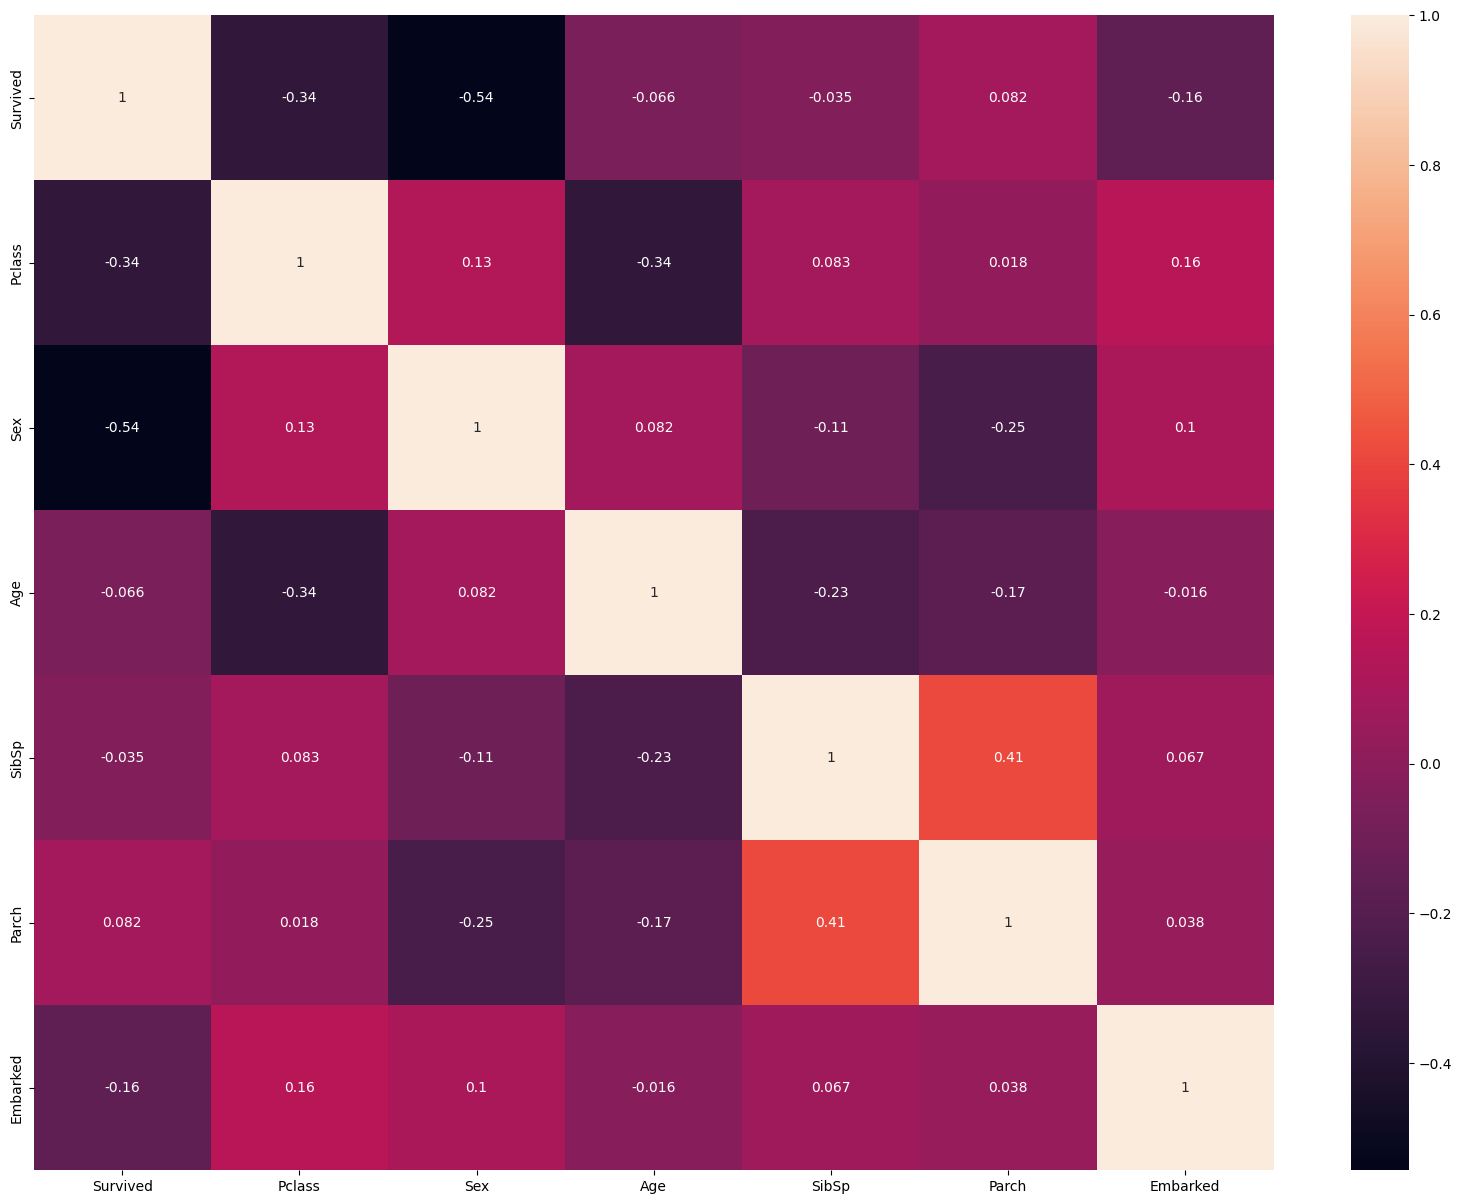

In [128]:
plt.figure(figsize=(20, 15))
sns.heatmap(preprocessed.corr(), annot=True)


# LOGISTIC REGRESSION

In [129]:
# split data
X = preprocessed.drop('Survived',axis=1)
y = preprocessed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [130]:
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.fit_transform(X_test)

TRAINING AND EVALUATION

In [131]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0]


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(y_test, y_pred):
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [133]:
evaluate(y_pred, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[99 19]
 [12 49]]
ACCURACY SCORE:
0.8268
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891892   0.720588  0.826816    0.806240      0.833515
recall       0.838983   0.803279  0.826816    0.821131      0.826816
f1-score     0.864629   0.759690  0.826816    0.812159      0.828868
support    118.000000  61.000000  0.826816  179.000000    179.000000


In [137]:
def preprocess_data(df):
    preprocessed = df
    preprocessed['Sex'] = preprocessing.LabelEncoder().fit_transform(df['Sex'])
    preprocessed['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
#     preprocessed["Cabin"] = preprocessed["Cabin"].fillna(0)
#     preprocessed["Cabin"] = preprocessed["Cabin"].map(lambda x: 1 if x != 0 else 0)
    preprocessed = preprocessed.drop("Cabin", axis=1)
    preprocessed = preprocessed.drop("Fare", axis=1)
    preprocessed = preprocessed.drop("Name", axis=1)
    preprocessed = preprocessed.drop("Ticket", axis=1)
    preprocessed = preprocessed.drop("PassengerId", axis=1)

    mean_age = round(preprocessed.loc[preprocessed["Age"] > 0, "Age"].values.mean(), 1)
    def fill_empty_age(row):
        if np.isnan(row["Age"]):
            return mean_age
        else:
            return row["Age"]
    
    def fill_empty_fare(row):
        if np.isnan(row["Fare"]):
            mean = round(preprocessed.loc[(preprocessed["Pclass"] == row["Pclass"]) & (preprocessed["Fare"] > 0), "Fare"].values.mean(), 1)
            print("mean", mean)
            return mean
        else:
            return row["Fare"]

    preprocessed["Age"] = preprocessed.apply(fill_empty_age, axis=1)
#     preprocessed["Fare"] = preprocessed.apply(fill_empty_fare, axis=1)

    return preprocessed

test_df = pd.read_csv("test.csv")
preprocessed = preprocess_data(test_df)
# test_df  = test_df.drop("Survived", axis=1)
preprocessed.info()
test_predict = classifier.predict(preprocessed)


output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': test_predict})
output.to_csv('submission.csv', index=False)
print(output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 16.5 KB
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
test = pd.read_csv("submission.csv")
print(test)